In [30]:
## Comenzare importando las librerias necesarias 
import os
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Cargar y limpiar el dataset
file_path = r"C:\Users\isabe\OneDrive - Universidad Autónoma Latinoamericana\Escritorio\CD2\flavors_of_cacao.csv"
df_chocolate = pd.read_csv(file_path)

In [14]:
# Limpieza de nombres de columnas y conversión de variables
df_chocolate.columns = df_chocolate.columns.str.replace(r"\s+|\n", " ", regex=True).str.strip()


In [15]:
# Convertir "Cocoa Percent" de string (con el símbolo "%") a float
df_chocolate["Cocoa Percent"] = df_chocolate["Cocoa Percent"].str.replace("%", "").astype(float)

EDA

In [ ]:
## Visualizar las primeras filas para conocer la estructura del dataset
print("Primeras 5 filas del dataset:")
print(df_chocolate.head(), "\n")

  Company (Maker-if known) Specific Bean Origin or Bar Name   REF  \
0                 A. Morin                      Agua Grande  1876   
1                 A. Morin                            Kpime  1676   
2                 A. Morin                           Atsane  1676   
3                 A. Morin                            Akata  1680   
4                 A. Morin                           Quilla  1704   

   Review Date  Cocoa Percent Company Location  Rating Bean Type  \
0         2016           63.0           France    3.75             
1         2015           70.0           France    2.75             
2         2015           70.0           France    3.00             
3         2015           70.0           France    3.50             
4         2015           70.0           France    3.50             

  Broad Bean Origin  
0          Sao Tome  
1              Togo  
2              Togo  
3              Togo  
4              Peru   



In [17]:
# Limpiar los nombres de columnas: quitar saltos de línea y espacios excesivos
df_chocolate.columns = df_chocolate.columns.str.replace(r"\s+|\n", " ", regex=True).str.strip()
print("Nombres de columnas después de la limpieza:")
print(df_chocolate.columns.tolist(), "\n")

Nombres de columnas después de la limpieza:
['Company (Maker-if known)', 'Specific Bean Origin or Bar Name', 'REF', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin'] 



In [ ]:
# Convertir la columna "Cocoa Percent" a string para aplicar el método .str.replace() y luego a float
df_chocolate["Cocoa Percent"] = df_chocolate["Cocoa Percent"].astype(str).str.replace("%", "").astype(float)

In [24]:
# Información general y estructura
print("Información general del dataset:")
print(df_chocolate.info(), "\n")
print("Dimensiones del dataset:", df_chocolate.shape, "\n")


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company (Maker-if known)          1795 non-null   object 
 1   Specific Bean Origin or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review Date                       1795 non-null   int64  
 4   Cocoa Percent                     1795 non-null   float64
 5   Company Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean Type                         1794 non-null   object 
 8   Broad Bean Origin                 1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB
None 

Dimensiones del dataset: (1795, 9) 



In [25]:
# Valores faltantes
missing_values = df_chocolate.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values, "\n")

Valores faltantes por columna:
Company (Maker-if known)            0
Specific Bean Origin or Bar Name    0
REF                                 0
Review Date                         0
Cocoa Percent                       0
Company Location                    0
Rating                              0
Bean Type                           1
Broad Bean Origin                   1
dtype: int64 



In [27]:
# Estadísticas descriptivas para variables numéricas
num_cols = ["REF", "Review Date", "Cocoa Percent", "Rating"]
print("Estadísticas descriptivas para variables numéricas:")
print(df_chocolate[num_cols].describe(), "\n")

print("Rangos de variables numéricas:")
for col in num_cols:
    print(f"  {col}: mínimo = {df_chocolate[col].min()}, máximo = {df_chocolate[col].max()}")
print("\n")

Estadísticas descriptivas para variables numéricas:
               REF  Review Date  Cocoa Percent       Rating
count  1795.000000  1795.000000    1795.000000  1795.000000
mean   1035.904735  2012.325348      71.698329     3.185933
std     552.886365     2.927210       6.323118     0.478062
min       5.000000  2006.000000      42.000000     1.000000
25%     576.000000  2010.000000      70.000000     2.875000
50%    1069.000000  2013.000000      70.000000     3.250000
75%    1502.000000  2015.000000      75.000000     3.500000
max    1952.000000  2017.000000     100.000000     5.000000 

Rangos de variables numéricas:
  REF: mínimo = 5, máximo = 1952
  Review Date: mínimo = 2006, máximo = 2017
  Cocoa Percent: mínimo = 42.0, máximo = 100.0
  Rating: mínimo = 1.0, máximo = 5.0




In [28]:
# Exploración de variables categóricas
cat_cols = [
    "Company (Maker-if known)",
    "Specific Bean Origin or Bar Name",
    "Company Location",
    "Bean Type",
    "Broad Bean Origin"
]

for col in cat_cols:
    unique_vals = df_chocolate[col].dropna().unique()
    print(f"Variable '{col}' tiene {len(unique_vals)} categorías. Ejemplos: {unique_vals[:5]}")
print("\n")

Variable 'Company (Maker-if known)' tiene 416 categorías. Ejemplos: ['A. Morin' 'Acalli' 'Adi' 'Aequare (Gianduja)' 'Ah Cacao']
Variable 'Specific Bean Origin or Bar Name' tiene 1039 categorías. Ejemplos: ['Agua Grande' 'Kpime' 'Atsane' 'Akata' 'Quilla']
Variable 'Company Location' tiene 60 categorías. Ejemplos: ['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico']
Variable 'Bean Type' tiene 41 categorías. Ejemplos: ['\xa0' 'Criollo' 'Trinitario' 'Forastero (Arriba)' 'Forastero']
Variable 'Broad Bean Origin' tiene 100 categorías. Ejemplos: ['Sao Tome' 'Togo' 'Peru' 'Venezuela' 'Cuba']




DISTRIBUCIONES

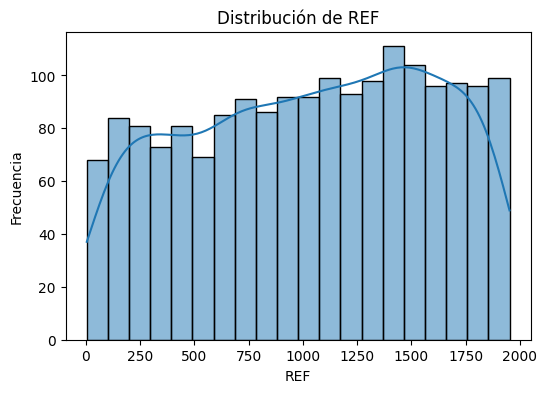

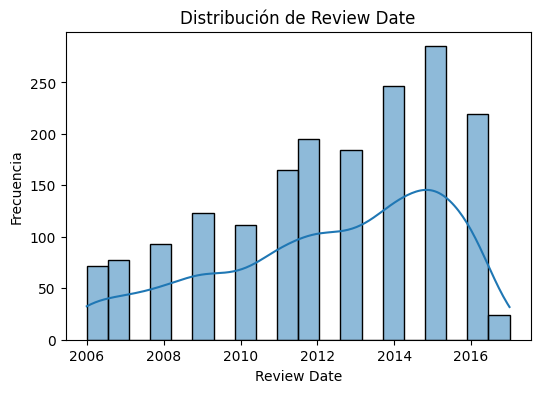

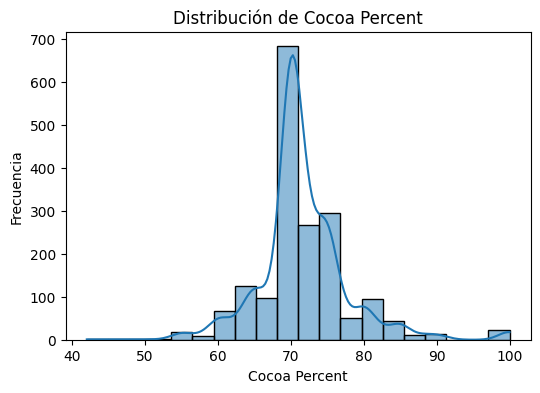

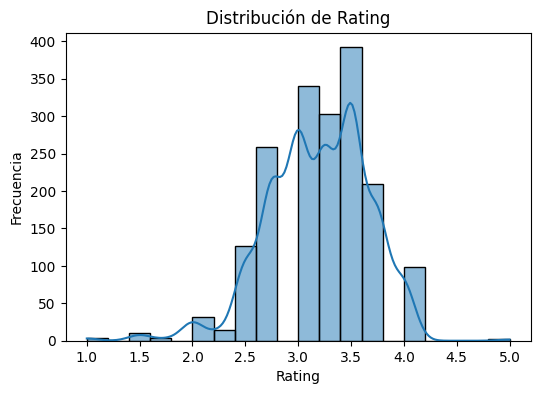

In [31]:
# Histogramas para variables numéricas
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_chocolate[col], bins=20, kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

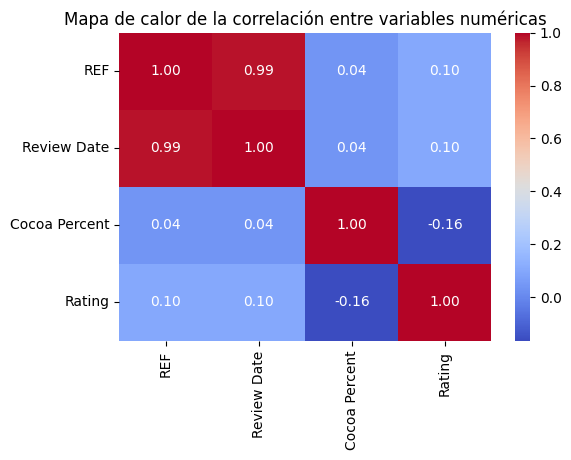

In [32]:
# Mapa de calor de la correlación entre variables numéricas
plt.figure(figsize=(6, 4))
corr_matrix = df_chocolate[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de la correlación entre variables numéricas")
plt.show()

PIPELINE

In [33]:
# Pipeline para variables numéricas: imputación con la media y escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [34]:
# Pipeline para variables categóricas: imputación con la moda y one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [35]:
# Combinar ambos pipelines en un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

In [36]:
# Integrar el preprocesamiento en un pipeline global
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
    # Se puede agregar un modelo al final, por ejemplo:
    # ('modelo', AlgúnModeloDeML())
])

In [37]:
# Aplicar el pipeline para transformar los datos
X_preprocessed = preprocessor.fit_transform(df_chocolate)
print("Dimensiones del dataset preprocesado:", X_preprocessed.shape)
print("\nEjemplo de datos preprocesados (primeras 5 filas):")
print(X_preprocessed[:5])

Dimensiones del dataset preprocesado: (1795, 1660)

Ejemplo de datos preprocesados (primeras 5 filas):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 45 stored elements and shape (5, 1660)>
  Coords	Values
  (0, 0)	1.5198952722457892
  (0, 1)	1.2556924408185062
  (0, 2)	-1.3760224260787608
  (0, 3)	1.1802309642076387
  (0, 4)	1.0
  (0, 434)	1.0
  (0, 1477)	1.0
  (0, 1559)	1.0
  (0, 1627)	1.0
  (1, 0)	1.158056481754302
  (1, 1)	0.9139750467510043
  (1, 2)	-0.26866521701739526
  (1, 3)	-0.9121291155481261
  (1, 4)	1.0
  (1, 912)	1.0
  (1, 1477)	1.0
  (1, 1559)	1.0
  (1, 1637)	1.0
  (2, 0)	1.158056481754302
  (2, 1)	0.9139750467510043
  (2, 2)	-0.26866521701739526
  (2, 3)	-0.38903909560918487
  (2, 4)	1.0
  (2, 487)	1.0
  (2, 1477)	1.0
  (2, 1559)	1.0
  (2, 1637)	1.0
  (3, 0)	1.1652932575641317
  (3, 1)	0.9139750467510043
  (3, 2)	-0.26866521701739526
  (3, 3)	0.6571409442686976
  (3, 4)	1.0
  (3, 435)	1.0
  (3, 1477)	1.0
  (3, 1559)	1.0
  (3, 1637)	1.0
  (4, 0)	1.20871391